<p align='center'>DATA COLLECTION</p>

In [877]:
import pandas as pd
df = pd.read_csv("spam_emails.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [878]:
df.shape

(5572, 2)

<p align='center'>DATA PRE-PROCESSING</p>

Handling Missing Data

In [879]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [880]:
# analyze datasets (how many emails are spam and how many are not)
df.groupby('Category').describe() 

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

Data Transformation

In [881]:
df['spam'] = df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


Data Cleaning

In [882]:
df.drop(['Category'], axis=1, inplace=True)
df.head()

,Message,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


Text Normalization

In [883]:
# Convert text data to lowercase
df['Message'] = df['Message'].str.lower()

In [884]:
# Remove special characters and punctuation
df['Message'] = df['Message'].str.replace(r'[^a-zA-Z0-9\s]', '' , regex=True)

<p align='center'>TRAIN TEST SPLIT DATA </p>

In [885]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['spam'], test_size=0.3, random_state=42)


<p align='center'>FEATURE EXTRACTION</p>

In [886]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Tokenize emails
vectorizer = TfidfVectorizer(stop_words='english', min_df=2, max_df=0.8, ngram_range=(1, 2))
X_train = vectorizer.fit_transform(X_train)  # Fit on training data

In [887]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

<p align='center' >SPAM DETECTION ALGOS</p>

MultinomialNB Naive Bayes

In [888]:
from sklearn.naive_bayes import MultinomialNB
N = MultinomialNB()
N.fit(X_train, y_train)

MultinomialNB()

Decision Tree/J48

In [889]:
# J48 (Decision Tree) both can be used in same context
from sklearn.tree import DecisionTreeClassifier
D = DecisionTreeClassifier()
D.fit(X_train, y_train)

DecisionTreeClassifier()

<p align='center'> PREDICTION </p>

For Random Mail

In [890]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = vectorizer.transform(emails) # we have first called the transform vector

MultinomialNB_Naive_Bayes = N.predict(emails_count)
J48 = D.predict(emails_count)

print("Naive Bayes Predictions:", MultinomialNB_Naive_Bayes)
print("J48 Predictions:", J48)

Naive Bayes Predictions: [0 1]
J48 Predictions: [0 0]


For Entire X_test

In [891]:
# Transform test data first then predict it
X_test = vectorizer.transform(X_test)      

y_pred_N = N.predict(X_test)
y_pred_D = D.predict(X_test)

<p align='center'>TIME RATE</p>

For Naive Bayes

In [892]:
import time

start_time = time.time()
N.fit(X_train, y_train)
end_time = time.time()
print(f"Time taken for training Naive Bayes: {end_time - start_time} seconds")

start_time = time.time()
y_pred_N = N.predict(X_test)
end_time = time.time()
print(f"Time taken for Naive Bayes prediction: {end_time - start_time} seconds")

Time taken for training Naive Bayes: 0.006927967071533203 seconds
Time taken for Naive Bayes prediction: 0.0 seconds


For J48

In [893]:
import time

start_time = time.time()
D.fit(X_train, y_train)
end_time = time.time()
print(f"Time taken for training J48: {end_time - start_time} seconds")

start_time = time.time()
y_pred_N = D.predict(X_test)
end_time = time.time()
print(f"Time taken for J48 prediction: {end_time - start_time} seconds")

Time taken for training J48: 1.2709624767303467 seconds
Time taken for J48 prediction: 0.001668691635131836 seconds


<p align='center'>ACCURACY</p>

In [894]:
from sklearn.metrics import accuracy_score

accuracy_N = accuracy_score(y_test, y_pred_N)
accuracy_D = accuracy_score(y_test, y_pred_D)

print("Naive Bayes Accuracy:", accuracy_N)
print("J48 (Decision Tree) Accuracy:", accuracy_D)

Naive Bayes Accuracy: 0.9581339712918661
J48 (Decision Tree) Accuracy: 0.9599282296650717


<p align='center'>ERROR RATE</p>

In [895]:
error_rate_N = 1 - accuracy_N
error_rate_D = 1 - accuracy_D

print("Naive Bayes Error Rate:", error_rate_N)
print("Decision Tree Error Rate:", error_rate_D)

Naive Bayes Error Rate: 0.04186602870813394
Decision Tree Error Rate: 0.04007177033492826


<p align='center'>CONFUSION MATRIX</p>

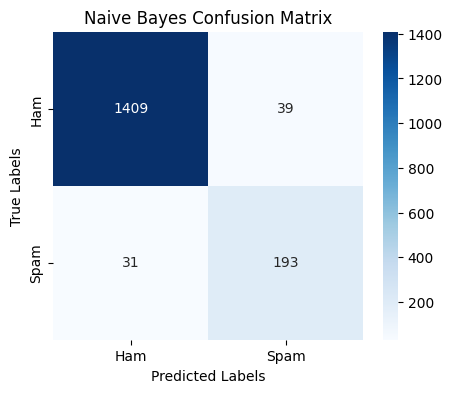

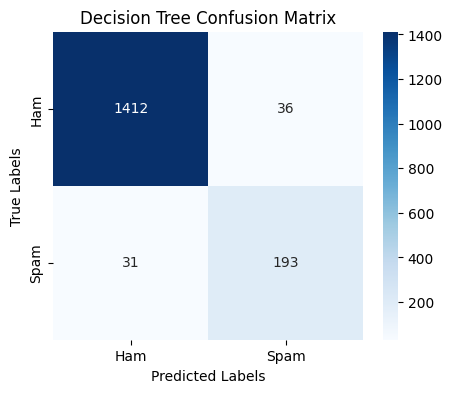

In [896]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title, labels):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

cm_N = confusion_matrix(y_test, y_pred_N)
cm_D = confusion_matrix(y_test, y_pred_D)

plot_confusion_matrix(cm_N, "Naive Bayes Confusion Matrix", labels=["Ham", "Spam"])
plot_confusion_matrix(cm_D, "Decision Tree Confusion Matrix", labels=["Ham", "Spam"])
